In [1]:
import numpy as np
import sys
import os
import pandas as pd
from topotest import TopoTestTwosample
import matplotlib.pyplot as plt
from  topotest.ecc import compute_ecc

In [2]:
polygon = np.loadtxt('dataset/Rennes_polygon.txt')
bpe = pd.read_csv('dataset/Rennes.csv')
bpe.drop(['Unnamed: 0', 'DEPCOM'], axis=1, inplace=True)
bpe_sch = bpe[bpe.TYPEQU == "C104"]
bpe_pha = bpe[bpe.TYPEQU == "D301"]
bpe_clo = bpe[bpe.TYPEQU == "B302"]
bpe_doc = bpe[bpe.TYPEQU == "D201"]

In [3]:
# Compute empirical ECCs
ecc_sch = compute_ecc(bpe_sch[['lambert_x', 'lambert_y']].to_numpy())
ecc_pha = compute_ecc(bpe_pha[['lambert_x', 'lambert_y']].to_numpy())
ecc_clo = compute_ecc(bpe_clo[['lambert_x', 'lambert_y']].to_numpy())
ecc_doc = compute_ecc(bpe_doc[['lambert_x', 'lambert_y']].to_numpy())

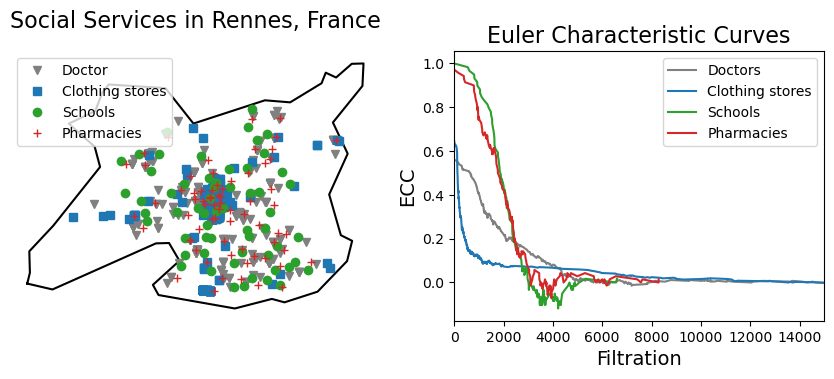

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10.5, 3.5))

# Draw city map
ax1.plot(polygon[:, 0], polygon[:, 1], '-', color='black')
ax1.plot(bpe_doc.lambert_x, bpe_doc.lambert_y, 'v', color='gray', label='Doctor')
ax1.plot(bpe_clo.lambert_x, bpe_clo.lambert_y, 's', color='tab:blue', label='Clothing stores')
ax1.plot(bpe_sch.lambert_x, bpe_sch.lambert_y, 'o', color='tab:green', label='Schools')
ax1.plot(bpe_pha.lambert_x, bpe_pha.lambert_y, '+', color='tab:red', label='Pharmacies')
ax1.set_title('Social Services in Rennes, France', fontsize=16)
ax1.axis('off')
ax1.legend()
# Draw Empirical ECCs
ax2.plot(np.sqrt(ecc_doc[:, 0]), ecc_doc[:, 1], '-', color='gray', label='Doctors')
ax2.plot(np.sqrt(ecc_clo[:, 0]), ecc_clo[:, 1], '-', color='tab:blue', label='Clothing stores')
ax2.plot(np.sqrt(ecc_sch[:, 0]), ecc_sch[:, 1], '-', color='tab:green', label='Schools')
ax2.plot(np.sqrt(ecc_pha[:, 0]), ecc_pha[:, 1], '-', color='tab:red', label='Pharmacies')
ax2.set_title('Euler Characteristic Curves', fontsize=16)
ax2.legend()
ax2.set_xlim((0, 15000))
ax2.set_xlabel('Filtration', fontsize=14)
ax2.set_ylabel('ECC', fontsize=14)
plt.show()

# Running tests

In [5]:
loops=100_000
# use loops=10_000 to get faster results

## Stores vs Schools

In [6]:
tt_cloth_schools = TopoTestTwosample(X1=bpe_clo[['lambert_x', 'lambert_y']].to_numpy(), X2=bpe_sch[['lambert_x', 'lambert_y']].to_numpy(), loops=loops)
print('pvalue in clothing stores vs schools:', tt_cloth_schools.pvalue)

pvalue in clothing stores vs schools: 0.0


## Stores vs Pharmacies

In [7]:
tt_cloth_pharma = TopoTestTwosample(X1=bpe_clo[['lambert_x', 'lambert_y']].to_numpy(), X2=bpe_pha[['lambert_x', 'lambert_y']].to_numpy(), loops=loops)
print('pvalue in clothing stores vs pharmacies:', tt_cloth_pharma.pvalue)

pvalue in clothing stores vs pharmacies: 0.0


## Stores vs Doctors

In [8]:
tt_cloth_doc = TopoTestTwosample(X1=bpe_clo[['lambert_x', 'lambert_y']].to_numpy(), X2=bpe_doc[['lambert_x', 'lambert_y']].to_numpy(), loops=loops)
print('pvalue in clothing stores vs doctors:', tt_cloth_doc.pvalue)

pvalue in clothing stores vs doctors: 0.0


## Pharmacies vs Doctors

In [9]:
tt_doc_pharma = TopoTestTwosample(X1=bpe_doc[['lambert_x', 'lambert_y']].to_numpy(), X2=bpe_pha[['lambert_x', 'lambert_y']].to_numpy(), loops=loops)
print('pvalue in clothing stores vs schools:', tt_doc_pharma.pvalue)

pvalue in clothing stores vs schools: 0.0


## Pharmacies vs Schools

In [10]:
tt_pharma_schools = TopoTestTwosample(X1=bpe_pha[['lambert_x', 'lambert_y']].to_numpy(), X2=bpe_sch[['lambert_x', 'lambert_y']].to_numpy(), loops=loops)
print('pvalue in clothing stores vs schools:', tt_pharma_schools.pvalue)

pvalue in clothing stores vs schools: 0.30956


## Doctors vs Schools

In [11]:
tt_doc_schools = TopoTestTwosample(X1=bpe_doc[['lambert_x', 'lambert_y']].to_numpy(), X2=bpe_sch[['lambert_x', 'lambert_y']].to_numpy(), loops=loops)
print('pvalue in clothing stores vs schools:', tt_doc_schools.pvalue)

pvalue in clothing stores vs schools: 0.0
